In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest\cavities


  0%|          | 0/2 [00:00<?, ?it/s]

Pareto: 3 optimal values, 3 objects
   Epk/Eacc []  Bpk/Eacc [mT/MV/m]
0     1.912193            4.733067
1     1.791248            5.481455
2     1.803702            5.537501


D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:550: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


Pareto: 5 optimal values, 5 objects
   Epk/Eacc []  Bpk/Eacc [mT/MV/m]
0     1.820421            4.959738
1     1.912193            4.733067
3     1.803702            5.537501
5     1.843551            5.047185
6     1.777149            5.580697
End time:  2024-08-15 10:45:19.533091


D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:550: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


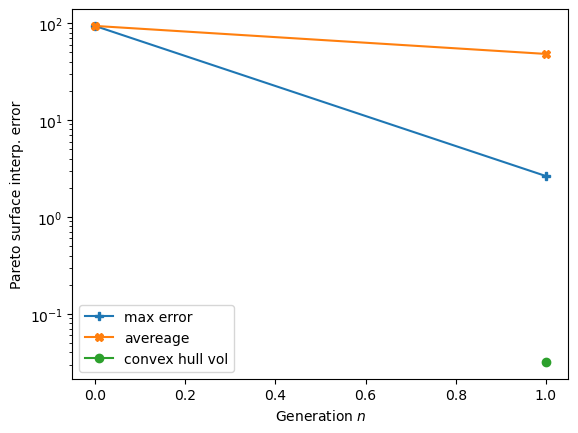

In [2]:
cavs = Cavities([])
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')
cell_type = 'end-end-cell'
optimisation_config = {
    'initial points': 5,
    'method': {
        'LHS': {'seed': 5},
        # 'Sobol Sequence': {'index': 2},
        # 'Random': {},
        # 'Uniform': {},
        },
    'cell type': cell_type,
    # 'mid cell': [1, 2, 3, 3, 6, 5, 2],  # must enter if mid-end cell selected
    'tune freq.': 801.58,
    'tune variable': 'Req',
    'optimisation by': 'pareto',
    'crossover factor': 5,
    'elites for crossover': 2,
    'mutation factor': 5,
    'chaos factor': 5,
    'processes': 3,
    'no. of generation': 2,
    'bounds': {'A': [20.0, 80.0],
               'B': [20.0, 80.0],
               'a': [10.0, 60.0],
               'b': [10., 60.0],
               'Ri': [60.0, 85.0],
               'L': [93.5, 93.5],
               'Req': [170.0, 170.0]},
    'constraints': {'Epk/Eacc []': [1.0, 3.0],
                    'Bpk/Eacc [mT/MV/m]': [1.0, 5.0]
                    },
    'objectives': [
        # ['equal', 'freq [MHz]', 801.58],
                      ['min', 'Epk/Eacc []'],
                      ['min', 'Bpk/Eacc [mT/MV/m]'],
                      # ['min', 'ZL', [1, 2, 5]],
                  ],
    'weights': [1, 1],
    'uq': {
        'option': True,
        'processes': 2,
        'variables': ['A', 'a'],
        'delta': [0.05, 0.05],
        'distribution': 'gaussian',
        # 'method': ['QMC', 'LHS', 1000],
        # 'method': ['QMC', 'Sobol', 1000],
        # 'method': ['Qudrature', 'Gaussian', 1000],
        'method': ['Quadrature', 'Stroud3'],
        # 'method': ['Quadrature', 'Stroud5'],
        # 'gaussian': ['Quadrature', 'Gaussian'],
        # 'from file': ['<file path>', columns],
        'cell type': cell_type
        }
}
cavs.run_optimisation(config=optimisation_config)